# 1. Subir datos



In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd


In [ ]:
!pip install pandas openpyxl

import pandas as pd

from google.colab import files

uploaded = files.upload()


file_name = next(iter(uploaded))

dt = pd.read_excel(file_name, engine='openpyxl')

print("Dataset 'dt' created successfully!")
print(f"\nFirst 5 rows of the dataset:")
print(dt.head())

print("\nDataset info:")
print(dt.info())

Saving CENSO POBLACIONAL AGOSTO (1).xlsx to CENSO POBLACIONAL AGOSTO (1).xlsx
Dataset 'dt' created successfully!

First 5 rows of the dataset:
   cod_dpto Departamento  cod_mpio   Municipio              fec_paquete  \
0        68    SANTANDER     68418  LOS SANTOS  2023-05-03 17:09:24.893   
1        68    SANTANDER     68418  LOS SANTOS  2023-05-03 17:09:24.893   
2        68    SANTANDER     68418  LOS SANTOS  2023-05-03 17:09:24.893   
3        68    SANTANDER     68418  LOS SANTOS  2023-05-03 17:09:24.893   
4        68    SANTANDER     68418  LOS SANTOS  2023-05-03 17:09:24.893   

   num_paquete  num_ficha  ide_ficha_origen  ide_edificacion ver_estructura  \
0         1687     128326      6.841800e+19                0    50118082017   
1         1687     128326      6.841800e+19                0    50118082017   
2         1687     128326      6.841800e+19                0    50118082017   
3         1687     128326      6.841800e+19                0    50118082017   
4         1

# 2. Remover nulos

Las columnas ordenadas por las que más contienen nulos

In [ ]:
null_percent_by_column = dt.isnull().mean() * 100
null_percent_by_column[null_percent_by_column > 0].sort_values(ascending=False)

,0
Cod_Chip,100.000000
Dir_Chip,100.000000
Email_contacto,98.344498
Jefe_UG,65.265265
fec_ini_visita2,48.594749
fec_ini_persona1,47.901748
fec_fin_persona1,47.894048
seg_nom_informante,47.555248
seg_nombre,37.337337
fec_fin_visita2,9.093709


Eliminar columnas con muchos nulos

In [ ]:
del dt['Cod_Chip']

del dt['Dir_Chip']

del dt['Email_contacto']

del dt['Jefe_UG']

del dt['fec_ini_visita2']

del dt['fec_ini_persona1']

del dt['fec_fin_persona1']

del dt['seg_nom_informante']

del dt['seg_nombre']



In [ ]:
null_percent_by_column = dt.isnull().mean() * 100
null_percent_by_column[null_percent_by_column > 0].sort_values(ascending=False)

,0
fec_fin_visita2,9.093709
fec_ini_visita1,5.336105
fec_fin_visita1,5.336105
fec_actualizacion_cns,4.612305
seg_ape_informante,3.033803
seg_apellido,1.955802
ide_firma_informante,1.078001


filas

In [ ]:

null_counts = dt.isnull().sum(axis=1)


rows_with_nulls = null_counts[null_counts > 0]

rows_with_nulls_sorted = rows_with_nulls.sort_values(ascending=False)

print("All rows with null values (sorted by null count):")
print(rows_with_nulls_sorted.to_string())

All rows with null values (sorted by null count):
7757     5
7602     5
3327     5
49       5
6003     4
6069     4
7603     4
7765     4
6672     4
8515     4
6002     4
4400     4
3464     4
6879     4
8926     4
4052     4
3461     4
8073     4
3462     4
3463     4
3328     4
47       4
48       4
2938     4
1071     4
6829     4
3706     4
2957     4
9605     4
7601     4
6000     4
4701     4
6001     4
4053     3
4054     3
3253     3
6880     3
3254     3
3255     3
3481     3
5618     3
3256     3
8497     3
3278     3
5636     3
3835     3
2470     3
3482     3
3092     3
5637     3
5638     3
5639     3
1517     3
4494     3
4493     3
4492     3
4491     3
919      3
9572     3
9573     3
9574     3
9575     3
3042     3
3043     3
3044     3
3707     3
1624     3
5546     3
3186     3
3187     3
3708     3
8516     3
6625     3
6673     3
882      3
4399     3
5548     3
5547     3
5545     3
9122     3
3090     3
3091     3
3185     3
8715     3
8812     3
6942     3
6928

Llenar columnas.
si es numerico: promedio
si es no numerico: moda

In [ ]:
import pandas as pd
import numpy as np


numerical_cols = dt.select_dtypes(include=[np.number]).columns.tolist()
non_numerical_cols = dt.select_dtypes(exclude=[np.number]).columns.tolist()

print(f"columnas numericas ({len(numerical_cols)}): {numerical_cols}")
print(f"colmunas no numericas ({len(non_numerical_cols)}): {non_numerical_cols}")


dt_filled = dt.copy()


for col in numerical_cols:
    if dt_filled[col].isnull().sum() > 0:
        col_mean = dt_filled[col].mean()
        dt_filled[col] = dt_filled[col].fillna(col_mean)
        print(f"Filled {col} with mean: {col_mean:.2f}")


for col in non_numerical_cols:
    if dt_filled[col].isnull().sum() > 0:
        col_mode = dt_filled[col].mode()[0]
        dt_filled[col] = dt_filled[col].fillna(col_mode)
        print(f"Filled {col} with mode: {col_mode}")


print("\nNull values after filling:")
print(dt_filled.isnull().sum().sum())

columnas numericas (214): ['cod_dpto', 'cod_mpio', 'num_paquete', 'num_ficha', 'ide_ficha_origen', 'ide_edificacion', 'ori_encuesta', 'Cod_clase', 'Cod_centro_poblado', 'Cod_area_coordinacion', 'Cod_area_operativa', 'Cod_uni_cobertura', 'Cod_comuna', 'Cod_corregimiento', 'Cod_vereda', 'Cod_barrio', 'Cod_enumerador', 'tot_viviendas', 'tot_hogares', 'ord_vivienda', 'ind_direccion', 'uso_vivienda', 'Coord_x_manual_rec', 'Coord_y_manual_rec', 'Coord_x_auto_rec', 'Coord_y_auto_rec', 'Gps_Alt_auto_rec', 'Gps_Distancia_rec', 'Coord_x_manual_enc', 'Coord_y_manual_enc', 'Coord_x_auto_enc', 'Coord_y_auto_enc', 'Gps_Alt_auto_enc', 'Gps_Distancia_enc', 'Est_nov_cartografia', 'Cod_digitador', 'ind_formato', 'Num_hogares_recuento', 'est_ficha', 'Cod_equipo_encuesta', 'Num_visita', 'Num_solicitud', 'Cod_UC_total', 'tip_vivienda', 'tip_mat_paredes', 'tip_mat_pisos', 'ind_tiene_energia', 'tip_estrato_energia', 'ind_tiene_alcantarillado', 'ind_tiene_gas', 'ind_tiene_recoleccion', 'ind_tiene_acueducto', 

# 3. Analisis

In [ ]:

print("Dataset Columns:")
for i, col in enumerate(dt_filled.columns, 1):
    print(f"{i}. {col}")


print("\nSample Values:")
print(dt_filled.iloc[0:3, :5])

Dataset Columns:
1. cod_dpto
2. Departamento
3. cod_mpio
4. Municipio
5. fec_paquete
6. num_paquete
7. num_ficha
8. ide_ficha_origen
9. ide_edificacion
10. ver_estructura
11. ori_encuesta
12. Cod_clase
13. Cod_centro_poblado
14. Cod_area_coordinacion
15. Cod_area_operativa
16. Cod_uni_cobertura
17. Cod_comuna
18. Cod_corregimiento
19. NOM_CORREGIMIENTO
20. Cod_vereda
21. NOM_VEREDA
22. Cod_barrio
23. NOM_BARRIO
24. Cod_enumerador
25. tot_viviendas
26. tot_hogares
27. ord_vivienda
28. ind_direccion
29. Dir_vivienda
30. uso_vivienda
31. Ide_foto
32. fec_ini_encuesta
33. fec_fin_encuesta
34. Coord_x_manual_rec
35. Coord_y_manual_rec
36. Coord_x_auto_rec
37. Coord_y_auto_rec
38. Gps_Alt_auto_rec
39. Fec_captura_gps_rec
40. Gps_Distancia_rec
41. Coord_x_manual_enc
42. Coord_y_manual_enc
43. Coord_x_auto_enc
44. Coord_y_auto_enc
45. Gps_Alt_auto_enc
46. Fec_captura_gps_enc
47. Gps_Distancia_enc
48. Est_nov_cartografia
49. Cod_digitador
50. Fec_digitacion
51. ind_formato
52. Num_hogares_recue

https://microdatos.dane.gov.co/index.php/catalog/643/data-dictionary/F8?file_name=VIVENDAS

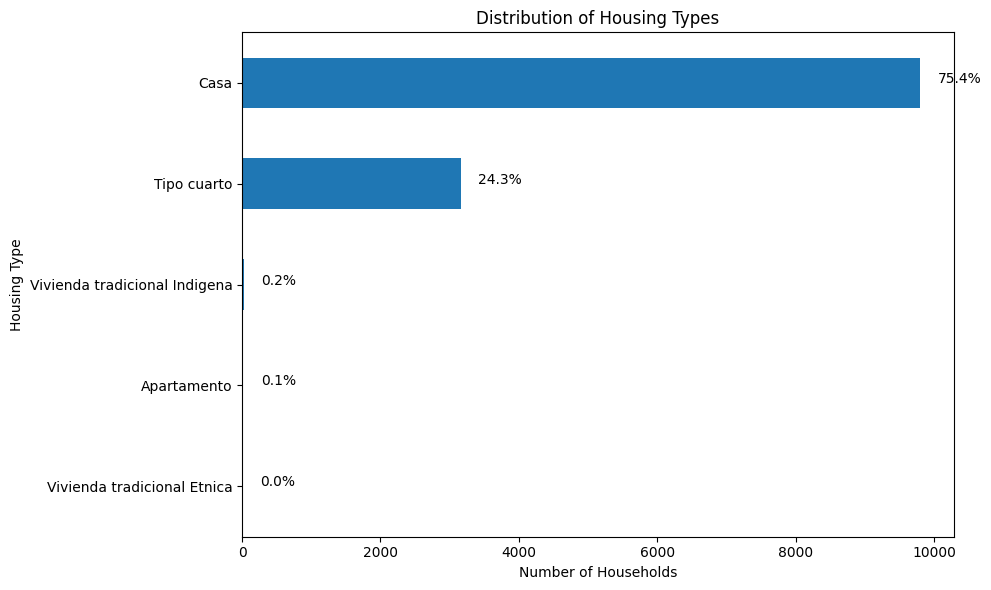

In [ ]:

if 'tip_vivienda' in dt_filled.columns:

    housing_type_map = {
        1: 'Casa',
        2: 'Apartamento',
        3: 'Tipo cuarto',
        4: 'Vivienda tradicional Indigena',
        5: 'Vivienda tradicional Etnica',
        6: 'Otro'
    }


    dt_filled['tip_vivienda_label'] = dt_filled['tip_vivienda'].map(housing_type_map)


    plt.figure(figsize=(10, 6))
    ax = dt_filled['tip_vivienda_label'].value_counts().sort_values().plot(kind='barh')
    plt.title('Distribution of Housing Types')
    plt.xlabel('Number of Households')
    plt.ylabel('Housing Type')


    total = len(dt_filled)
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_width()/total)
        x = p.get_x() + p.get_width() + 0.02*total
        y = p.get_y() + p.get_height()/2
        ax.annotate(percentage, (x, y))

    plt.tight_layout()
    plt.show()

Sexo:
1. Hombre
2. Mujer

<ipython-input-10-ad7d8e5a756c>:11: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pivot = dt_filled.pivot_table(index='age_group', columns='sexo_persona',


<Figure size 2000x2200 with 0 Axes>

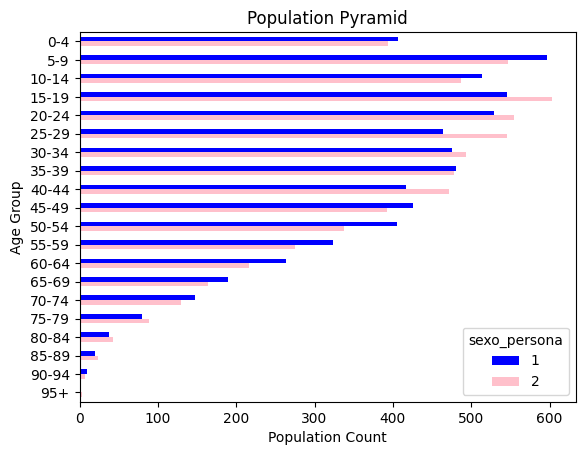

In [ ]:

if all(col in dt_filled.columns for col in ['sexo_persona', 'edad_calculada']):

    bins = [0, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90, 95, 100]
    labels = ['0-4', '5-9', '10-14', '15-19', '20-24', '25-29', '30-34', '35-39',
              '40-44', '45-49', '50-54', '55-59', '60-64', '65-69', '70-74',
              '75-79', '80-84', '85-89', '90-94', '95+']

    dt_filled['age_group'] = pd.cut(dt_filled['edad_calculada'], bins=bins, labels=labels)


    pivot = dt_filled.pivot_table(index='age_group', columns='sexo_persona',
                                values='ide_persona', aggfunc='count')

    plt.figure(figsize=(20, 22))
    pivot.plot(kind='barh', stacked=False, color=['blue', 'pink'])
    plt.title('Population Pyramid')
    plt.xlabel('Population Count')
    plt.ylabel('Age Group')
    plt.gca().invert_yaxis()
    plt.show()

Indice de leer y escribir:
- 1: Sí
- 2: No
- 9: No informa

# Agrupacion por mayor de edad / menor de edad

Crear nueva columna que indica si es adulto o no

In [ ]:
dt_filled['es_adulto'] = dt_filled['edad_calculada'] >= 18


print("Adult/Non-Adult Distribution:")
print(dt_filled['es_adulto'].value_counts(normalize=True) * 100)

Adult/Non-Adult Distribution:
es_adulto
True     71.579272
False    28.420728
Name: proportion, dtype: float64


In [ ]:
print(dt_filled['es_adulto'].head())  #

0     True
1     True
2    False
3     True
4     True
Name: es_adulto, dtype: bool


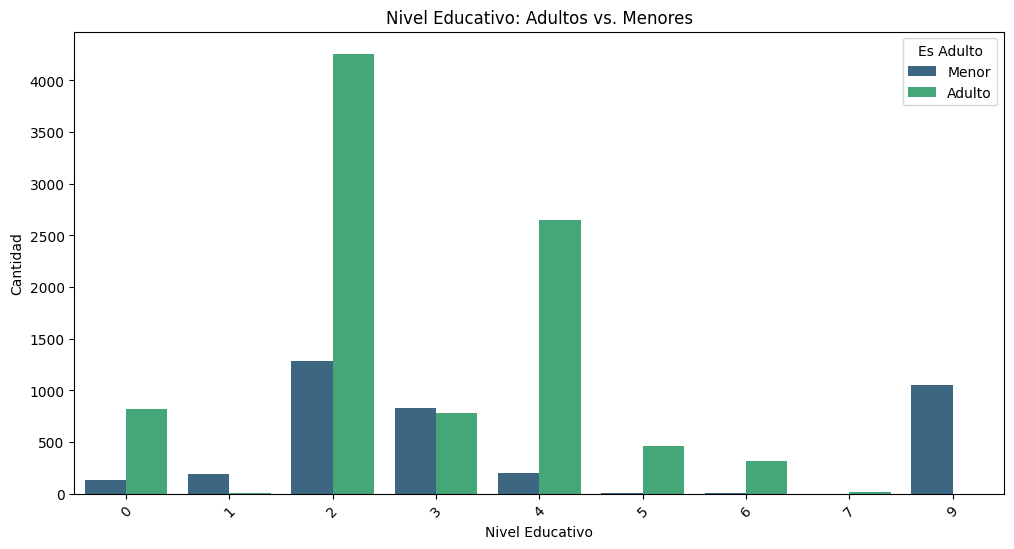

In [ ]:
if 'niv_educativo' in dt_filled.columns:
    plt.figure(figsize=(12, 6))
    sns.countplot(data=dt_filled, x='niv_educativo', hue='es_adulto', palette='viridis')
    plt.title('Nivel Educativo: Adultos vs. Menores')
    plt.xlabel('Nivel Educativo')
    plt.ylabel('Cantidad')
    plt.xticks(rotation=45)
    plt.legend(title='Es Adulto', labels=['Menor', 'Adulto'])
    plt.show()

# Agrupaciones por Vereda

In [ ]:
municipios_unicos = dt_filled['NOM_VEREDA'].unique()


print(f"Total unique municipalities: {len(municipios_unicos)}")
print("\nSample municipalities:")
print(municipios_unicos[:20])

Total unique municipalities: 34

Sample municipalities:
['ROSABLANCA' 'SIN VEREDA' 'EL POZO' 'EL DIAMANTE' 'LAGUNA ALTA'
 'MAJADAL ALTO' 'GARBANZAL' 'EL GUAMITO' 'LA FUENTE' 'DELICIAS'
 'LAS LLANADAS' 'EL POTRERO' 'ESPINAL BAJO' 'REGADERO ALTO' 'LOS TERES'
 'LOMA DE PURNIA' 'LA PURNIA' 'PIEDRA DEL RAYO' 'LAGUNA BAJA' 'PASOCHICO']


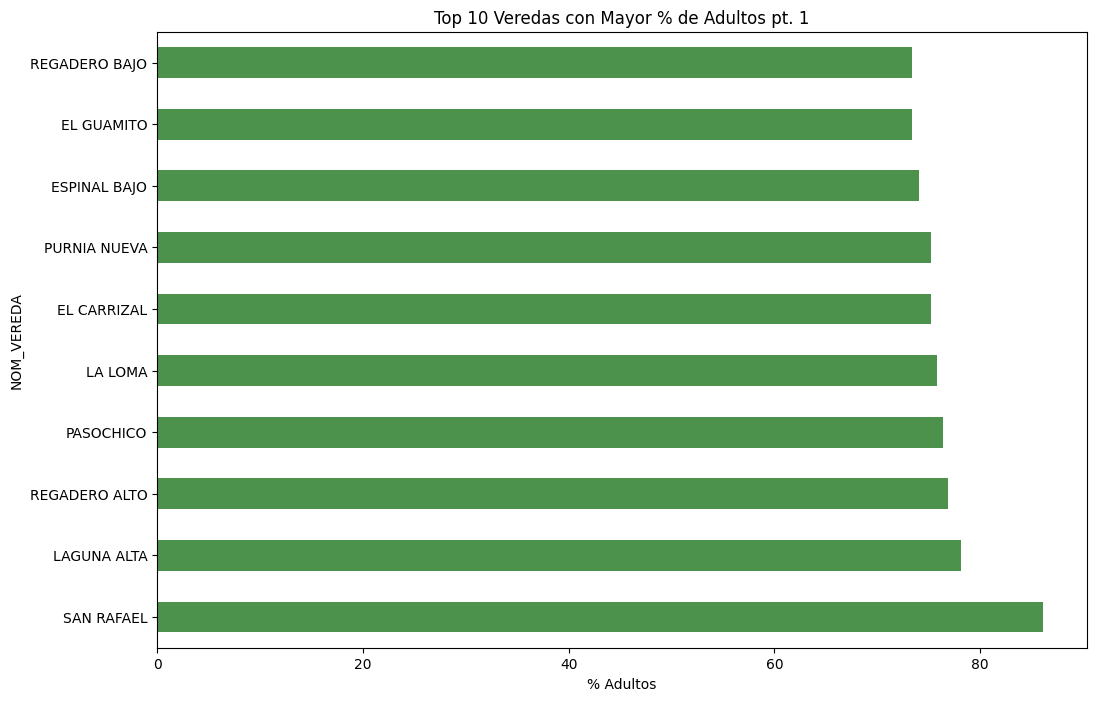

In [ ]:

town_stats = dt_filled.groupby('NOM_VEREDA')['es_adulto'].agg(['mean', 'count'])
town_stats['mean'] = town_stats['mean'] * 100
town_stats = town_stats.rename(columns={'mean': '% Adultos', 'count': 'Total Población'})

town_stats_filtered = town_stats[town_stats['Total Población'] > 100].sort_values('% Adultos', ascending=False)

plt.figure(figsize=(12, 8))
town_stats_filtered['% Adultos'].head(10).plot(kind='barh', color='darkgreen', alpha=0.7)
plt.title('Top 10 Veredas con Mayor % de Adultos pt. 1')
plt.xlabel('% Adultos')
plt.show()

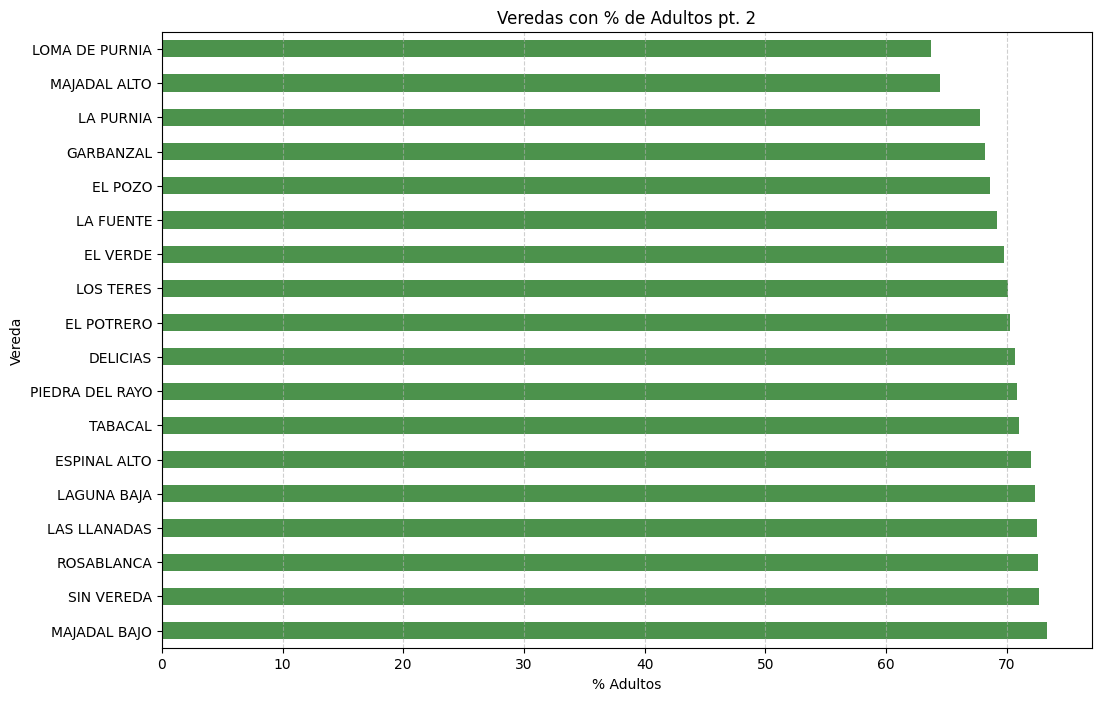

In [ ]:

town_stats_non_top10 = town_stats_filtered.iloc[10:]


plt.figure(figsize=(12, 8))
town_stats_non_top10['% Adultos'].plot(kind='barh', color='darkgreen', alpha=0.7)
plt.title('Veredas con % de Adultos pt. 2')
plt.xlabel('% Adultos')
plt.ylabel('Vereda')
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.show()

<Figure size 1400x700 with 0 Axes>

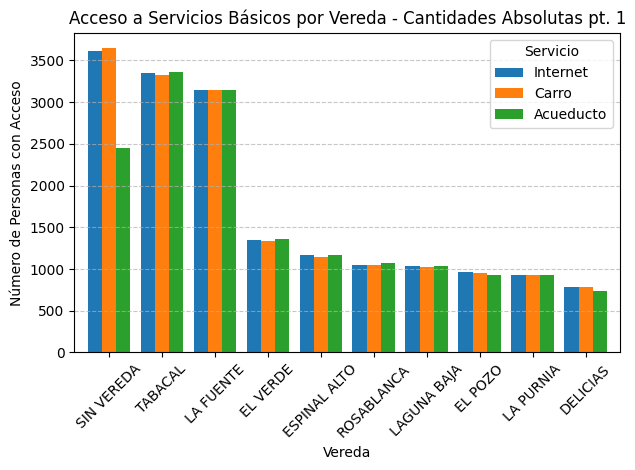

In [ ]:
assets = ['ind_tiene_internet', 'ind_tiene_carro', 'ind_tiene_acueducto']


town_assets_count = dt_filled.groupby('NOM_VEREDA')[assets].sum().sort_values('ind_tiene_internet', ascending=False)


town_population = dt_filled['NOM_VEREDA'].value_counts()


town_assets_count = town_assets_count.join(town_population.rename('total_poblacion'))


town_assets_count = town_assets_count[town_assets_count['total_poblacion'] > 100]


plt.figure(figsize=(14, 7))
town_assets_count.head(10)[assets].plot(kind='bar', width=0.8)
plt.title('Acceso a Servicios Básicos por Vereda - Cantidades Absolutas pt. 1')
plt.ylabel('Número de Personas con Acceso')
plt.xlabel('Vereda')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)


plt.legend(['Internet', 'Carro', 'Acueducto'], title='Servicio')
plt.tight_layout()
plt.show()

<Figure size 1600x1000 with 0 Axes>

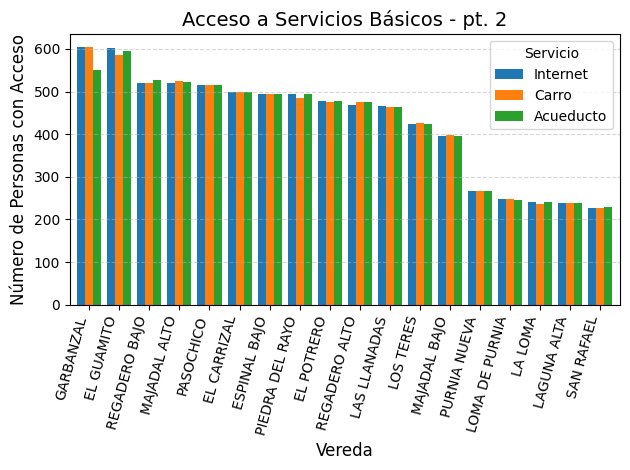

In [ ]:
assets = ['ind_tiene_internet', 'ind_tiene_carro', 'ind_tiene_acueducto']

town_assets_count = dt_filled.groupby('NOM_VEREDA')[assets].sum()
town_assets_count = town_assets_count.join(dt_filled['NOM_VEREDA'].value_counts().rename('total_poblacion'))
town_assets_count = town_assets_count.sort_values('ind_tiene_internet', ascending=False)

non_top_towns = town_assets_count[town_assets_count['total_poblacion'] > 100].iloc[10:]

plt.figure(figsize=(16, 10))
ax = non_top_towns[assets].plot(kind='bar', width=0.8)
plt.title('Acceso a Servicios Básicos - pt. 2', fontsize=14)
plt.ylabel('Número de Personas con Acceso', fontsize=12)
plt.xlabel('Vereda', fontsize=12)
plt.xticks(rotation=75, ha='right', fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.5)


plt.legend(['Internet', 'Carro', 'Acueducto'], title='Servicio')
plt.tight_layout()
plt.show()

<Figure size 1600x800 with 0 Axes>

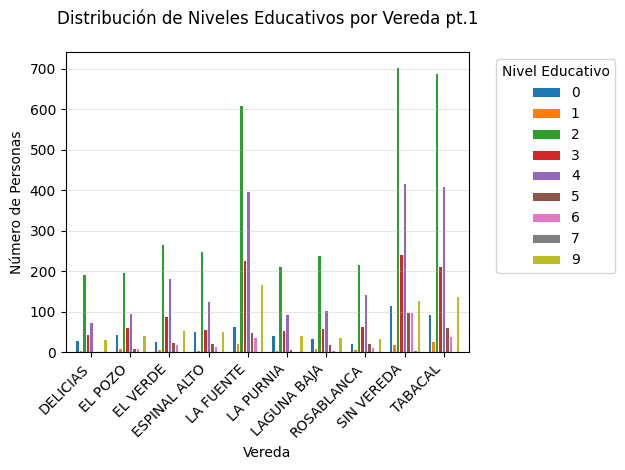

In [ ]:
if 'niv_educativo' in dt_filled.columns:

    top_towns = dt_filled['NOM_VEREDA'].value_counts().head(10).index


    edu_by_town = pd.crosstab(
        dt_filled[dt_filled['NOM_VEREDA'].isin(top_towns)]['NOM_VEREDA'],
        dt_filled['niv_educativo']
    )


    plt.figure(figsize=(16, 8))
    edu_by_town.plot(kind='bar', width=0.8, edgecolor='white', linewidth=0.7)
    plt.title('Distribución de Niveles Educativos por Vereda pt.1', pad=20)
    plt.xlabel('Vereda')
    plt.ylabel('Número de Personas')
    plt.xticks(rotation=45, ha='right')
    plt.legend(title='Nivel Educativo', bbox_to_anchor=(1.05, 1))
    plt.grid(axis='y', alpha=0.3)
    plt.tight_layout()
    plt.show()

<Figure size 2000x1000 with 0 Axes>

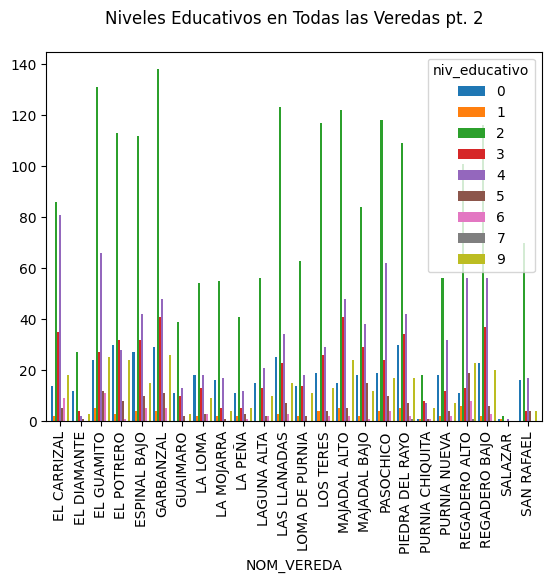

In [ ]:
if 'niv_educativo' in dt_filled.columns:
    other_towns = dt_filled[~dt_filled['NOM_VEREDA'].isin(top_towns)]


    town_counts = other_towns['NOM_VEREDA'].value_counts()
    small_towns = town_counts[town_counts < 5].index
    other_towns.loc[other_towns['NOM_VEREDA'].isin(small_towns), 'NOM_VEREDA'] = 'Otras veredas pequeñas'


    plt.figure(figsize=(20, 10))
    pd.crosstab(other_towns['NOM_VEREDA'], other_towns['niv_educativo'])\
      .plot(kind='bar', width=0.9)
    plt.title('Niveles Educativos en Todas las Veredas pt. 2', pad=20)
    plt.xticks(rotation=90)
    plt.show()

# Agrupaciones por Corregimiento

In [ ]:

print("Column 'NOM_CORREGIMIENTO' Overview:")
print(f"Total rows: {len(dt_filled)}")
print(f"Non-null values: {dt_filled['NOM_CORREGIMIENTO'].count()}")
print(f"Null values: {dt_filled['NOM_CORREGIMIENTO'].isnull().sum()}")
print(f"Number of unique values: {dt_filled['NOM_CORREGIMIENTO'].nunique()}")


print("\nAll unique values in 'NOM_CORREGIMIENTO':")
unique_corregimientos = dt_filled['NOM_CORREGIMIENTO'].unique()
print(unique_corregimientos)

Column 'NOM_CORREGIMIENTO' Overview:
Total rows: 12987
Non-null values: 12987
Null values: 0
Number of unique values: 4

All unique values in 'NOM_CORREGIMIENTO':
['SIN CORREGIMIENTO' 'CORREGIMIENTO_S4' 'SAN MIGUEL' 'MAJADAL']


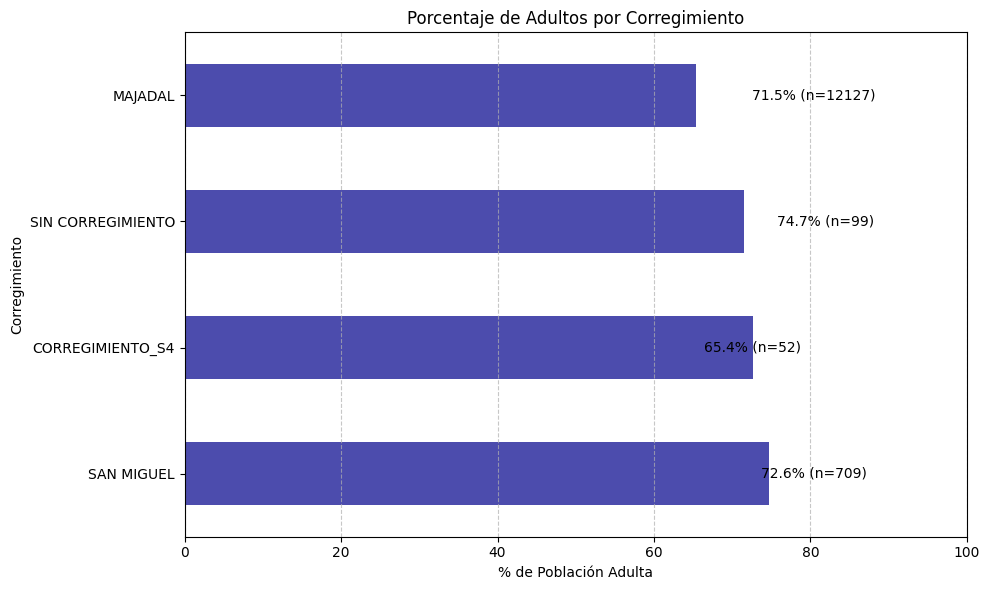


Estadísticas detalladas por corregimiento:


,% Adultos,Total Población
NOM_CORREGIMIENTO,,
SAN MIGUEL,74.747475,99
CORREGIMIENTO_S4,72.637518,709
SIN CORREGIMIENTO,71.518100,12127
MAJADAL,65.384615,52


In [ ]:

corregimiento_stats = dt_filled.groupby('NOM_CORREGIMIENTO')['es_adulto'].agg(['mean', 'count'])
corregimiento_stats['mean'] = corregimiento_stats['mean'] * 100
corregimiento_stats = corregimiento_stats.rename(columns={'mean': '% Adultos', 'count': 'Total Población'})


plt.figure(figsize=(10, 6))
corregimiento_stats.sort_values('% Adultos', ascending=False)['% Adultos'].plot(
    kind='barh',
    color='darkblue',
    alpha=0.7
)


for i, (value, count) in enumerate(zip(
    corregimiento_stats['% Adultos'],
    corregimiento_stats['Total Población']
)):
    plt.text(value+1, i,
             f'{value:.1f}% (n={count})',
             va='center')

plt.title('Porcentaje de Adultos por Corregimiento')
plt.xlabel('% de Población Adulta')
plt.ylabel('Corregimiento')
plt.xlim(0, 100)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


print("\nEstadísticas detalladas por corregimiento:")
display(corregimiento_stats.sort_values('% Adultos', ascending=False))

<Figure size 1200x600 with 0 Axes>

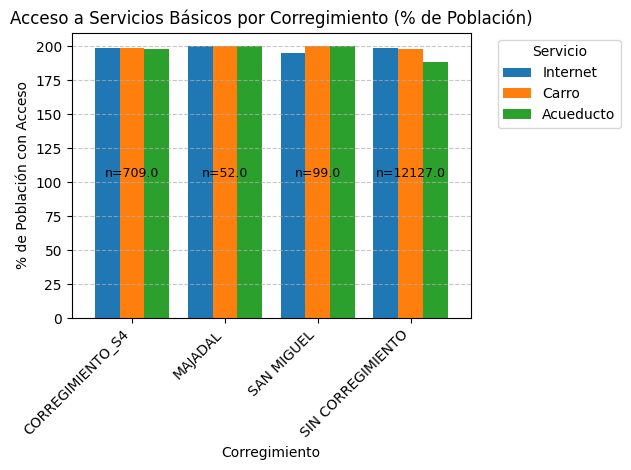


Datos detallados (% de acceso):


,ind_tiene_internet,ind_tiene_carro,ind_tiene_acueducto,total_poblacion
NOM_CORREGIMIENTO,,,,
CORREGIMIENTO_S4,199.0%,199.2%,198.3%,709
MAJADAL,200.0%,200.0%,200.0%,52
SAN MIGUEL,194.9%,200.0%,200.0%,99
SIN CORREGIMIENTO,198.6%,198.0%,188.2%,12127


In [ ]:

assets = ['ind_tiene_internet', 'ind_tiene_carro', 'ind_tiene_acueducto']

corregimiento_assets = dt_filled.groupby('NOM_CORREGIMIENTO')[assets].mean() * 100


corregimiento_population = dt_filled['NOM_CORREGIMIENTO'].value_counts().rename('total_poblacion')

corregimiento_assets = corregimiento_assets.join(corregimiento_population)

plt.figure(figsize=(12, 6))
ax = corregimiento_assets[assets].plot(
    kind='bar',
    width=0.8,
    color=['#1f77b4', '#ff7f0e', '#2ca02c']
)

plt.title('Acceso a Servicios Básicos por Corregimiento (% de Población)')
plt.ylabel('% de Población con Acceso')
plt.xlabel('Corregimiento')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)

for i, (_, row) in enumerate(corregimiento_assets.iterrows()):
    ax.text(i, 102, f'n={row["total_poblacion"]}',
            ha='center', va='bottom', fontsize=9)

plt.legend(['Internet', 'Carro', 'Acueducto'], title='Servicio', bbox_to_anchor=(1.05, 1))
plt.tight_layout()
plt.show()

print("\nDatos detallados (% de acceso):")
display(corregimiento_assets.style.format({
    'ind_tiene_internet': '{:.1f}%',
    'ind_tiene_carro': '{:.1f}%',
    'ind_tiene_acueducto': '{:.1f}%'
}))

<Figure size 1400x700 with 0 Axes>

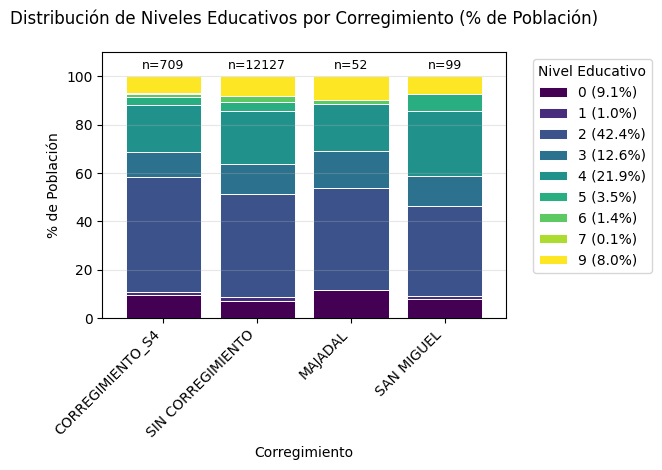


Distribución porcentual por corregimiento:


niv_educativo,0,1,2,3,4,5,6,7,9
NOM_CORREGIMIENTO,,,,,,,,,
CORREGIMIENTO_S4,9.4%,1.3%,47.5%,10.6%,19.2%,3.5%,1.3%,0.1%,7.1%
SIN CORREGIMIENTO,7.2%,1.5%,42.4%,12.5%,22.0%,3.6%,2.5%,0.1%,8.1%
MAJADAL,11.5%,0.0%,42.3%,15.4%,19.2%,0.0%,1.9%,0.0%,9.6%
SAN MIGUEL,8.1%,1.0%,37.4%,12.1%,27.3%,7.1%,0.0%,0.0%,7.1%


In [ ]:
if 'niv_educativo' in dt_filled.columns:

    edu_by_corregimiento = pd.crosstab(
        dt_filled['NOM_CORREGIMIENTO'],
        dt_filled['niv_educativo'],
        normalize='index'
    ) * 100


    edu_by_corregimiento = edu_by_corregimiento.loc[
        edu_by_corregimiento.max(axis=1).sort_values(ascending=False).index
    ]


    plt.figure(figsize=(14, 7))
    ax = edu_by_corregimiento.plot(
        kind='bar',
        stacked=True,
        width=0.8,
        colormap='viridis',
        edgecolor='white',
        linewidth=0.7
    )

    plt.title('Distribución de Niveles Educativos por Corregimiento (% de Población)', pad=20)
    plt.xlabel('Corregimiento')
    plt.ylabel('% de Población')
    plt.xticks(rotation=45, ha='right')

    # Add population annotations
    pop_counts = dt_filled['NOM_CORREGIMIENTO'].value_counts()
    for i, correg in enumerate(edu_by_corregimiento.index):
        ax.text(i, 102, f'n={pop_counts[correg]}',
                ha='center', va='bottom', fontsize=9)

    plt.legend(
        title='Nivel Educativo',
        bbox_to_anchor=(1.05, 1),
        labels=[f"{lvl} ({edu_by_corregimiento[lvl].mean():.1f}%)"
               for lvl in edu_by_corregimiento.columns]
    )

    plt.grid(axis='y', alpha=0.3)
    plt.ylim(0, 110)
    plt.tight_layout()
    plt.show()


    print("\nDistribución porcentual por corregimiento:")
    display(edu_by_corregimiento.style.format('{:.1f}%'))

In [ ]:
# Define the event columns
event_columns = [
    'ind_evento_inundacion',
    'num_evento_inundacion',
    'ind_evento_terremoto',
    'ind_evento_vendaval'
]

# Calculate statistics
total_rows = len(dt_filled)
event_stats = []

for col in event_columns:
    if col in dt_filled.columns:
        non_zero = (dt_filled[col] != 0).sum()
        event_stats.append({
            'Event Type': col.replace('ind_', '').replace('num_', '').replace('_', ' ').title(),
            'Non-Zero Rows': non_zero,
            'Percentage': f"{(non_zero / total_rows * 100):.2f}%",
            'Total Rows': total_rows
        })

# Create and display the summary table
event_summary = pd.DataFrame(event_stats)
print("\nEvent Occurrence Summary:")
display(event_summary)

# Calculate rows with ANY event
any_event_mask = (dt_filled[event_columns] != 0).any(axis=1)
any_event_count = any_event_mask.sum()

print(f"\nRows with ANY event: {any_event_count} ({any_event_count/total_rows*100:.2f}%)")
print(f"Rows with NO events: {total_rows - any_event_count} ({(total_rows - any_event_count)/total_rows*100:.2f}%)")


Event Occurrence Summary:


,Event Type,Non-Zero Rows,Percentage,Total Rows
0,Evento Inundacion,12987,100.00%,12987
1,Evento Inundacion,131,1.01%,12987
2,Evento Terremoto,12987,100.00%,12987
3,Evento Vendaval,12987,100.00%,12987



Rows with ANY event: 12987 (100.00%)
Rows with NO events: 0 (0.00%)


# Analisis de poder economico

In [ ]:
percentiles = dt_filled['vlr_total_gastos'].quantile([0.1, 0.25, 0.5, 0.75, 0.9])
print("Percentiles de poder economico:")
print(percentiles)


threshold = percentiles[0.1]
low_spenders = dt_filled[dt_filled['vlr_total_gastos'] <= threshold].copy()

print(f"\Hay {len(low_spenders)} en el 10% más bajo")

Percentiles de poder economico:
0.10     190000.0
0.25     300000.0
0.50     462000.0
0.75     697750.0
0.90    1020000.0
Name: vlr_total_gastos, dtype: float64
\Hay 1306 en el 10% más bajo


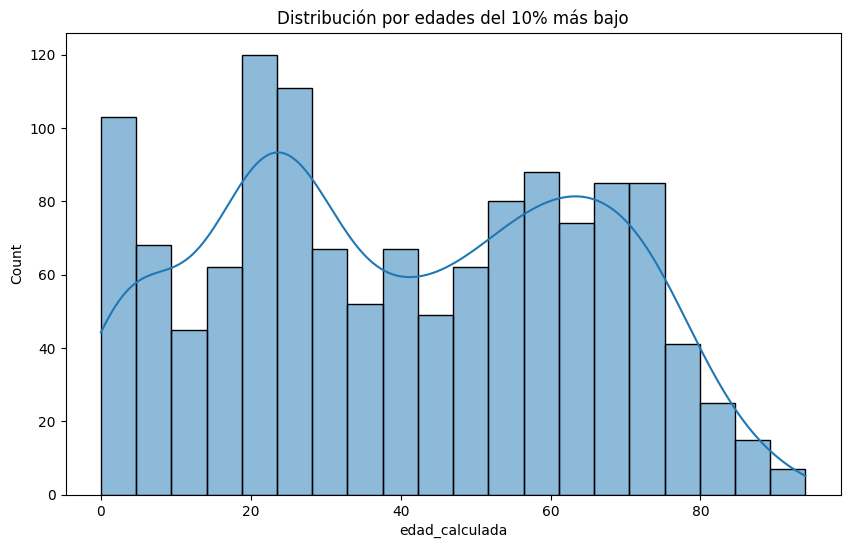


Gender Distribution:
sexo_persona
2    50.995406
1    49.004594
Name: proportion, dtype: float64


In [ ]:

plt.figure(figsize=(10, 6))
sns.histplot(low_spenders['edad_calculada'], bins=20, kde=True)
plt.title('Distribución por edades del 10% más bajo')
plt.show()


if 'sexo_persona' in low_spenders.columns:
    gender_dist = low_spenders['sexo_persona'].value_counts(normalize=True) * 100
    print("\nGender Distribution:")
    print(gender_dist)

In [ ]:
housing_vars = [
    'tip_vivienda',
    'tip_mat_paredes',
    'tip_mat_pisos',
    'ind_tiene_energia',
    'ind_tiene_acueducto'
]

print("\nHousing Characteristics (%):")
for var in housing_vars:
    if var in low_spenders.columns:
        print(f"\n{var}:")
        print(low_spenders[var].value_counts(normalize=True).head(5) * 100)


Housing Characteristics (%):

tip_vivienda:
tip_vivienda
1    56.738132
3    42.879020
4     0.229709
5     0.153139
Name: proportion, dtype: float64

tip_mat_paredes:
tip_mat_paredes
2    46.477795
1    44.333844
3     4.900459
6     1.761103
7     1.148545
Name: proportion, dtype: float64

tip_mat_pisos:
tip_mat_pisos
3    56.814701
5    29.862175
2    12.863706
6     0.229709
4     0.229709
Name: proportion, dtype: float64

ind_tiene_energia:
ind_tiene_energia
1    94.793262
2     5.206738
Name: proportion, dtype: float64

ind_tiene_acueducto:
ind_tiene_acueducto
2    92.189893
1     7.810107
Name: proportion, dtype: float64


In [ ]:
plt.figure(figsize=(14, 8))
town_stats_filtered.sort_values('pct_low_spenders', ascending=False).head(20)['pct_low_spenders'].plot(
    kind='barh',
    color='darkblue'
)
plt.title('Las veredas con mayorporcentaje de gente de poco poder economico')
plt.xlabel('% de personas que tienen bajo poder economico')
plt.ylabel('Vereda')
plt.grid(axis='x', alpha=0.3)
plt.tight_layout()
plt.show()



KeyError: 'pct_low_spenders'

<Figure size 1400x800 with 0 Axes>

In [ ]:
if 'Departamento' in dt_filled.columns:
    dept_comparison = dt_filled.groupby('Departamento')['vlr_total_gastos'].median()
    print("\nMedian Spending by Department:")
    print(dept_comparison.sort_values())


Median Spending by Department:
Departamento
SANTANDER    462000.0
Name: vlr_total_gastos, dtype: float64


In [ ]:
san_rafael = dt_filled[dt_filled['NOM_VEREDA'] == 'SAN RAFAEL']
other_veredas = dt_filled[dt_filled['NOM_VEREDA'] != 'SAN RAFAEL']

<Figure size 1200x600 with 0 Axes>

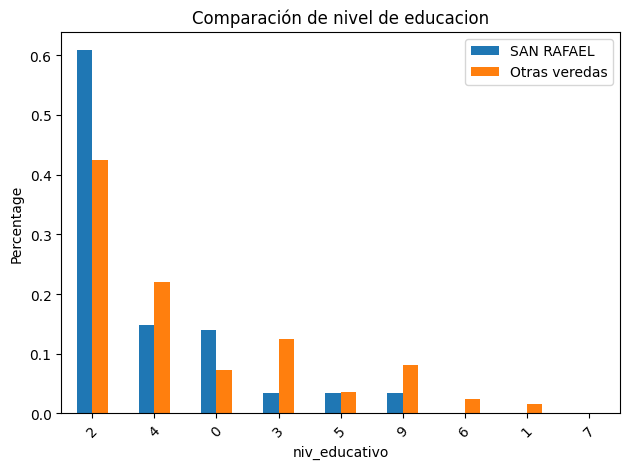

In [ ]:
if 'niv_educativo' in dt_filled.columns:
    plt.figure(figsize=(12, 6))
    pd.concat([
        san_rafael['niv_educativo'].value_counts(normalize=True).rename('SAN RAFAEL'),
        other_veredas['niv_educativo'].value_counts(normalize=True).rename('Otras veredas')
    ], axis=1).plot(kind='bar')
    plt.title('Comparación de nivel de educacion')
    plt.ylabel('Percentage')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

<Figure size 1200x600 with 0 Axes>

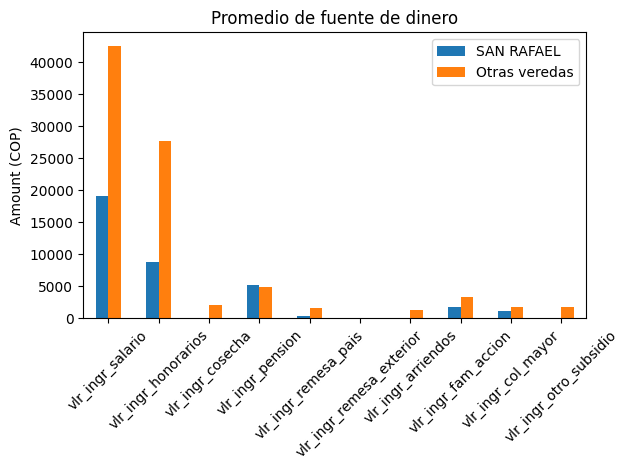

In [ ]:
income_sources = [c for c in dt_filled.columns if c.startswith('vlr_ingr_') and c != 'vlr_total_gastos']
if income_sources:
    plt.figure(figsize=(12, 6))
    pd.DataFrame({
        'SAN RAFAEL': san_rafael[income_sources].mean(),
        'Otras veredas': other_veredas[income_sources].mean()
    }).plot(kind='bar')
    plt.title('Promedio de fuente de dinero')
    plt.ylabel('Amount (COP)')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

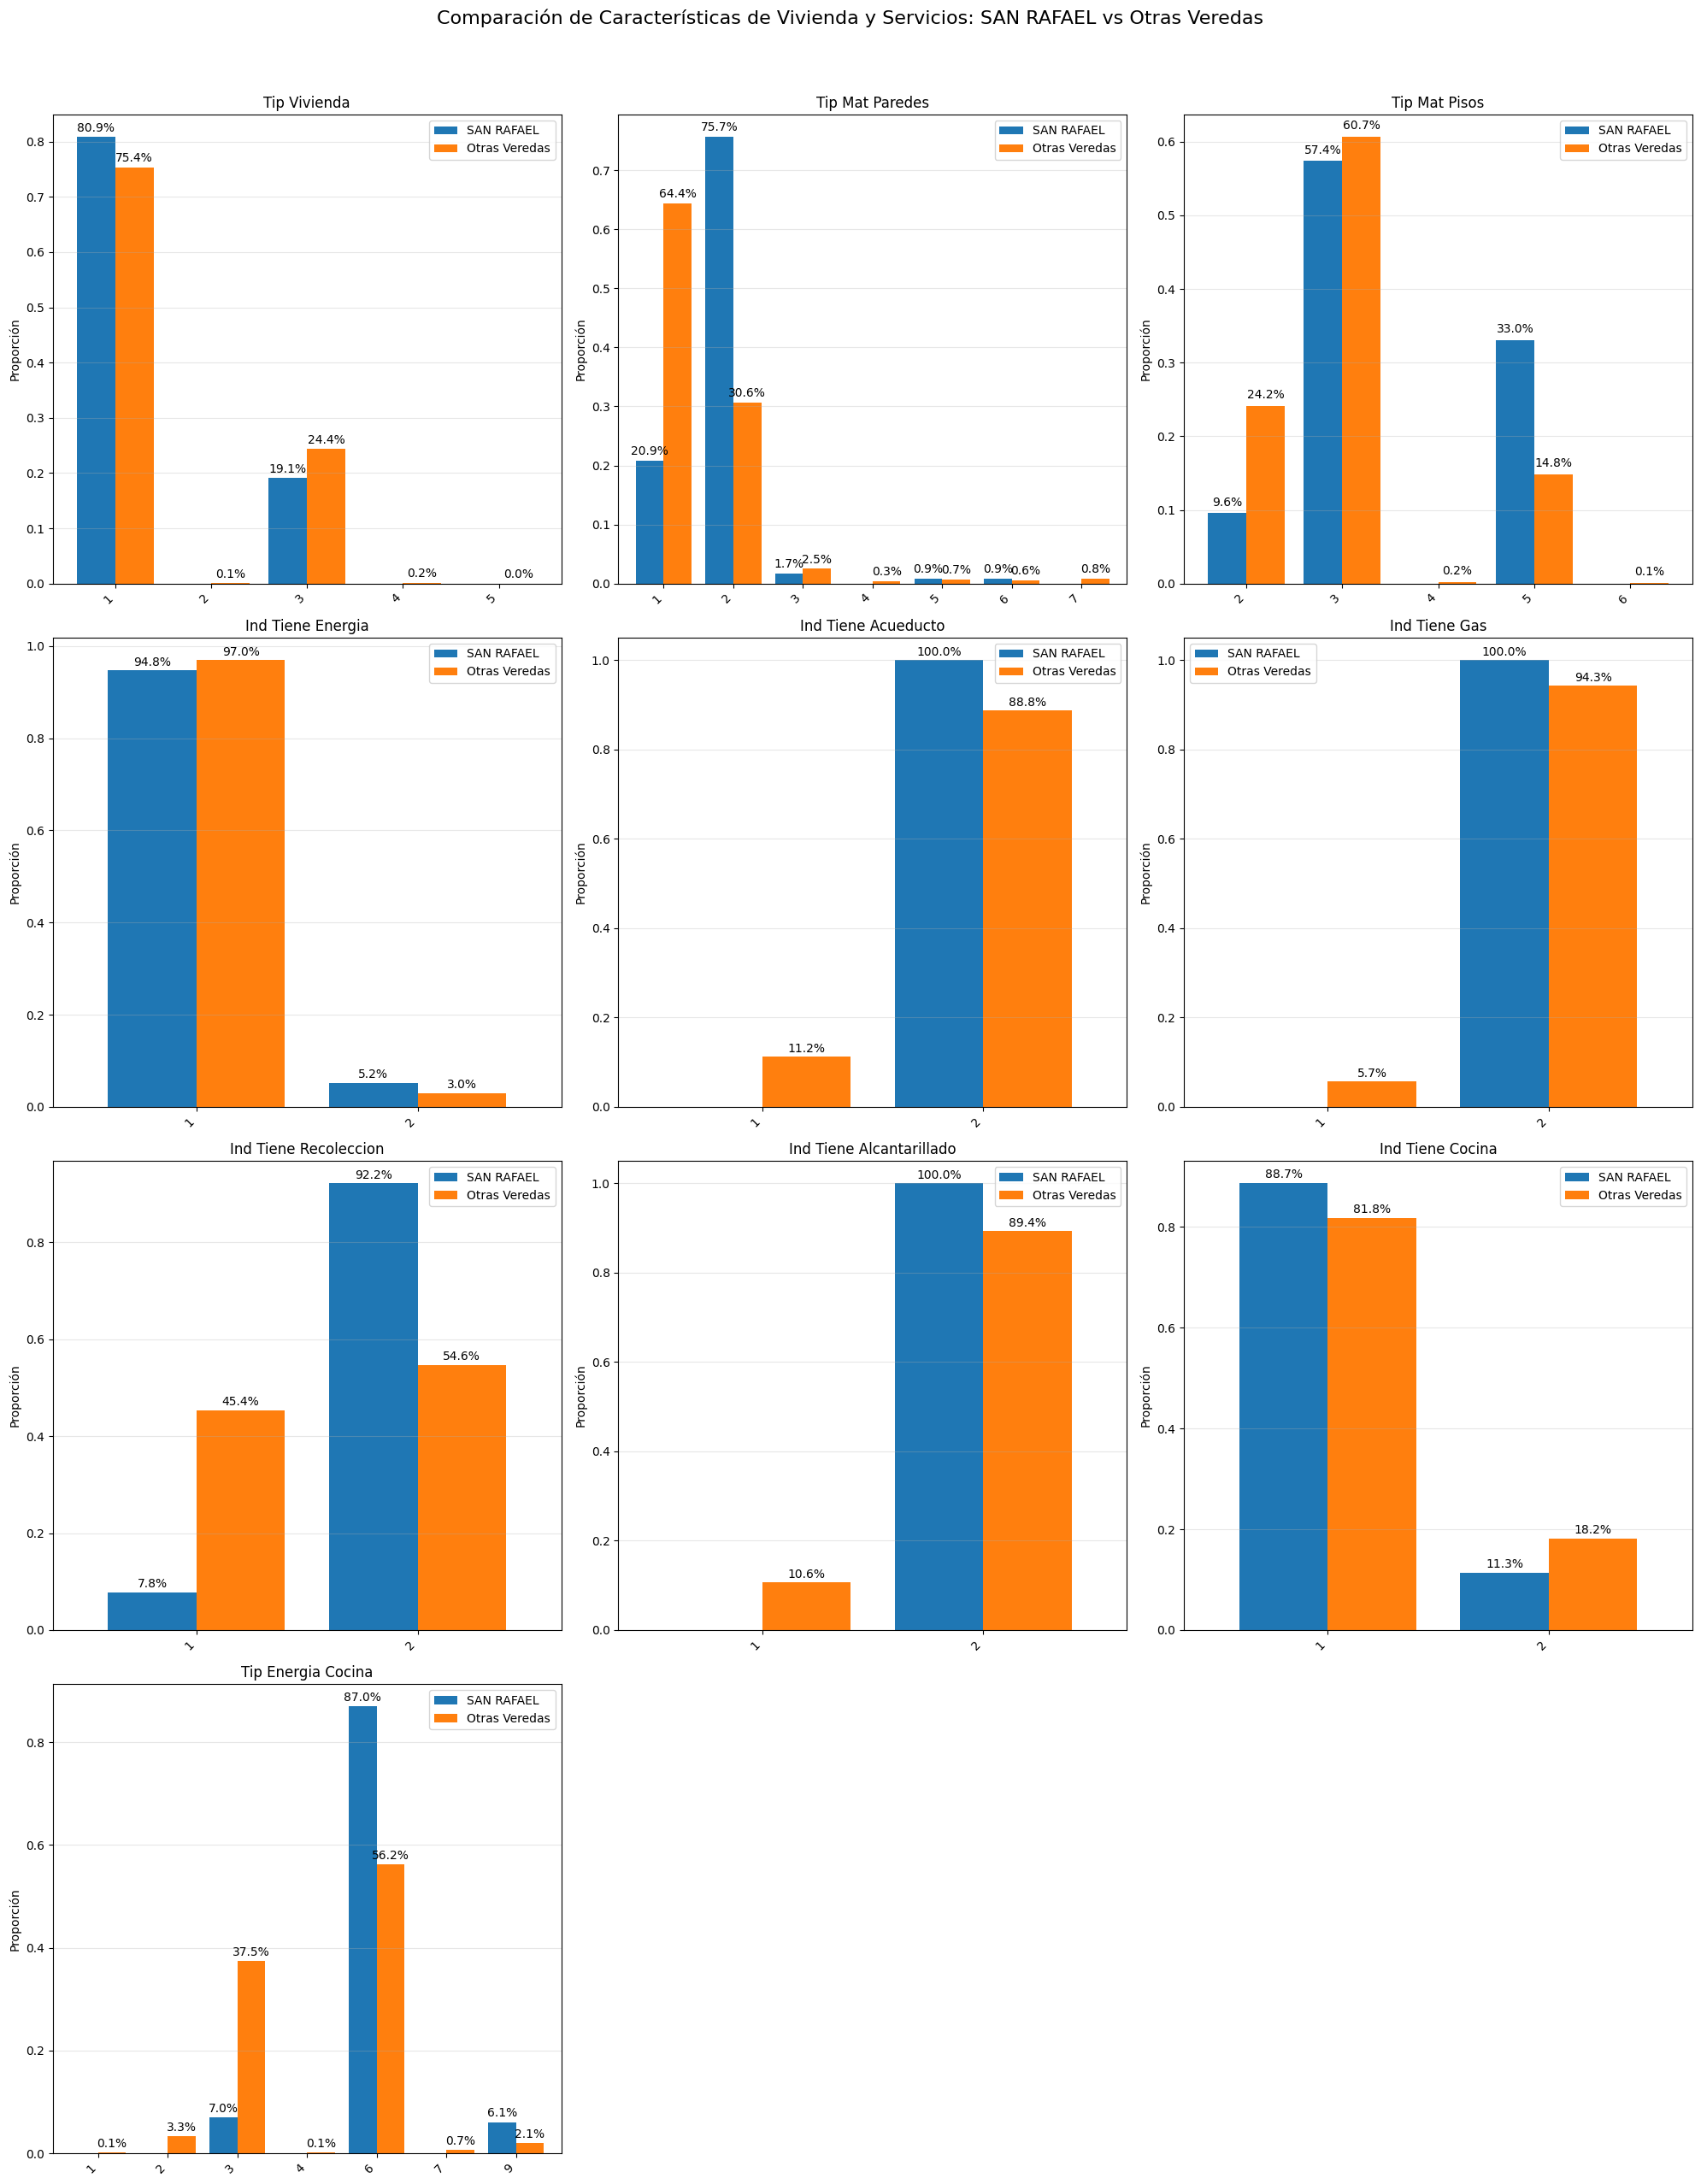


Resumen Comparativo (Valores Modales):


ValueError: could not convert string to float: '5.5%'

In [ ]:
comparison_columns = [
    'tip_vivienda', 'tip_mat_paredes', 'tip_mat_pisos',
    'ind_tiene_energia', 'ind_tiene_acueducto', 'ind_tiene_gas',
    'ind_tiene_recoleccion', 'ind_tiene_alcantarillado',
    'ind_tiene_cocina', 'tip_energia_cocina'
]


plt.figure(figsize=(20, 25))
plt.suptitle('Comparación de Características de Vivienda y Servicios: SAN RAFAEL vs Otras Veredas',
             y=1.02, fontsize=16)

for i, col in enumerate(comparison_columns, 1):
    plt.subplot(4, 3, i)


    sr_counts = san_rafael[col].value_counts(normalize=True).sort_index()
    ov_counts = other_veredas[col].value_counts(normalize=True).sort_index()

    plot_df = pd.DataFrame({'SAN RAFAEL': sr_counts, 'Otras Veredas': ov_counts})

    plot_df.plot(kind='bar', ax=plt.gca(), color=['#1f77b4', '#ff7f0e'], width=0.8)

    plt.title(col.replace('_', ' ').title())
    plt.ylabel('Proporción')
    plt.xlabel('')
    plt.xticks(rotation=45, ha='right')
    plt.grid(axis='y', alpha=0.3)

    for p in plt.gca().patches:
        height = p.get_height()
        if height > 0:
            plt.gca().text(p.get_x() + p.get_width()/2., height + 0.01,
                         f'{height:.1%}', ha='center')

plt.tight_layout()
plt.show()

summary_data = []
for col in comparison_columns:
    sr_mode = san_rafael[col].mode()[0]
    ov_mode = other_veredas[col].mode()[0]
    sr_pct = (san_rafael[col] == sr_mode).mean() * 100
    ov_pct = (other_veredas[col] == ov_mode).mean() * 100

    summary_data.append({
        'Variable': col.replace('_', ' ').title(),
        'Moda SAN RAFAEL': sr_mode,
        '% SAN RAFAEL': f'{sr_pct:.1f}%',
        'Moda Otras Veredas': ov_mode,
        '% Otras Veredas': f'{ov_pct:.1f}%',
        'Diferencia': f'{sr_pct-ov_pct:.1f}%'
    })

summary_df = pd.DataFrame(summary_data)
print("\nResumen Comparativo (Valores Modales):")
display(summary_df.style
       .background_gradient(subset=['Diferencia'], cmap='RdBu')
       .set_properties(**{'text-align': 'left'}))

In [ ]:
print("\nValue counts in SAN RAFAEL:")
print(san_rafael['ind_esta_embarazada'].value_counts(dropna=False))

print("\nValue counts in Other Veredas:")
print(other_veredas['ind_esta_embarazada'].value_counts(dropna=False))


def calculate_true_percentage(series):
    """Calculate percentage of 'Yes' responses for binary indicators"""
    return (series == 1).mean() * 100

health_comparison_corrected = pd.DataFrame({
    'San Rafael': san_rafael[health_disability_cols].apply(calculate_true_percentage),
    'Other Veredas': other_veredas[health_disability_cols].apply(calculate_true_percentage),
    'diferencia (pp)': (san_rafael[health_disability_cols].apply(calculate_true_percentage) -
                      other_veredas[health_disability_cols].apply(calculate_true_percentage))
}).sort_values('diferencia (pp)', ascending=False)


print("\nComparación de discapacidades")
display(health_comparison_corrected.style.format("{:.1f}%").background_gradient(
    subset=['diferencia (pp)'],
    cmap='RdBu',
    vmin=-20,
    vmax=20
))


print("\nPossible values in health/disability columns:")
for col in health_disability_cols:
    print(f"{col}: {dt_filled[col].unique()}")


Value counts in SAN RAFAEL:
ind_esta_embarazada
9    86
2    29
Name: count, dtype: int64

Value counts in Other Veredas:
ind_esta_embarazada
9    7941
2    4817
1     114
Name: count, dtype: int64


NameError: name 'health_disability_cols' is not defined

<Figure size 1400x700 with 0 Axes>

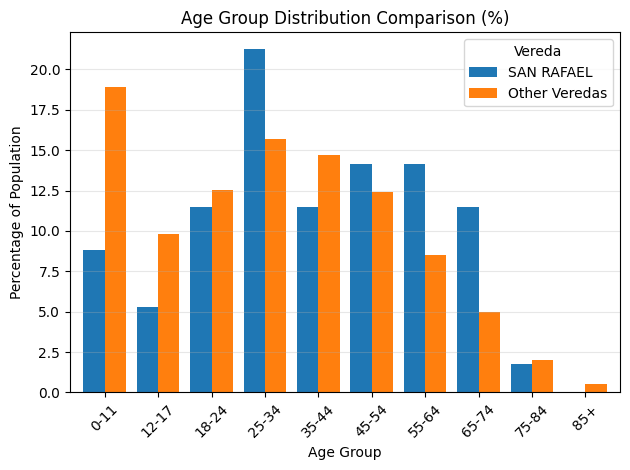


Corrected Age Group Distribution (% of population):


,SAN RAFAEL,Other Veredas,Diferencia (pp)
edad_calculada,,,
0-11,8.8%,18.9%,-10.1%
12-17,5.3%,9.8%,-4.5%
18-24,11.5%,12.5%,-1.0%
25-34,21.2%,15.7%,5.6%
35-44,11.5%,14.7%,-3.2%
45-54,14.2%,12.4%,1.8%
55-64,14.2%,8.5%,5.6%
65-74,11.5%,5.0%,6.6%
75-84,1.8%,2.0%,-0.2%


In [ ]:
bins = [0, 12, 18, 25, 35, 45, 55, 65, 75, 85, 120]
labels = ['0-11', '12-17', '18-24', '25-34', '35-44',
          '45-54', '55-64', '65-74', '75-84', '85+']


san_rafael_age_groups = pd.cut(san_rafael['edad_calculada'], bins=bins, labels=labels)
other_veredas_age_groups = pd.cut(other_veredas['edad_calculada'], bins=bins, labels=labels)


age_groups = pd.DataFrame({
    'SAN RAFAEL': san_rafael_age_groups.value_counts(normalize=True).sort_index() * 100,
    'Other Veredas': other_veredas_age_groups.value_counts(normalize=True).sort_index() * 100
})

age_groups['Diferencia (pp)'] = age_groups['SAN RAFAEL'] - age_groups['Other Veredas']

plt.figure(figsize=(14, 7))
age_groups[['SAN RAFAEL', 'Other Veredas']].plot(kind='bar', width=0.8)
plt.title('Age Group Distribution Comparison (%)')
plt.ylabel('Percentage of Population')
plt.xlabel('Age Group')
plt.xticks(rotation=45)
plt.grid(axis='y', alpha=0.3)
plt.legend(title='Vereda')
plt.tight_layout()
plt.show()

print("\nCorrected Age Group Distribution (% of population):")
display(age_groups.style.format('{:.1f}%').background_gradient(
    subset=['Diferencia (pp)'],
    cmap='RdBu',
    vmin=-10,
    vmax=10
))